_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [13]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Analyzing and Forecasting Real Estate Market Trends in Melbourne</div>

<div class="usecase-authors"><b>Authored by: </b>Gloria Chemutai Kiplagat</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Matplotlib, Pandas.</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json

In [14]:
# Load and prepare the datasets
def load_and_prepare_data(development_file, structure_file):
    # Load development data
    dev_df = pd.read_csv(development_file)
    struct_df = pd.read_csv(structure_file)
    
    # Convert coordinates to numeric
    dev_df['longitude'] = pd.to_numeric(dev_df['longitude'], errors='coerce')
    dev_df['latitude'] = pd.to_numeric(dev_df['latitude'], errors='coerce')
    
    # Convert year_completed to integer
    dev_df['year_completed'] = pd.to_numeric(dev_df['year_completed'], errors='coerce').astype('Int64')
    
    # Clean and prepare structure data
    struct_df['coordinates'] = struct_df['Geo Point'].str.split(',').apply(
        lambda x: [float(x[1].strip()), float(x[0].strip())] if isinstance(x, list) else None
    )
    
    return dev_df, struct_df

In [15]:
def analyze_development_trends(dev_df):
    """Analyze development trends over time"""
    # Group by year and calculate key metrics
    yearly_stats = dev_df.groupby('year_completed').agg({
        'resi_dwellings': 'sum',
        'car_spaces': 'sum',
        'office_flr': 'sum',
        'retail_flr': 'sum',
        'property_id': 'count'
    }).reset_index()
    
    # Create development trend visualization
    plt.figure(figsize=(15, 10))
    
    # Plot multiple metrics
    plt.subplot(2, 1, 1)
    plt.plot(yearly_stats['year_completed'], yearly_stats['resi_dwellings'], 
             marker='o', label='Residential Dwellings')
    plt.plot(yearly_stats['year_completed'], yearly_stats['property_id'], 
             marker='s', label='Total Developments')
    plt.title('Development Trends Over Time')
    plt.legend()
    plt.grid(True)
    
    # Plot commercial space trends
    plt.subplot(2, 1, 2)
    plt.plot(yearly_stats['year_completed'], yearly_stats['office_flr'], 
             marker='o', label='Office Floor Space')
    plt.plot(yearly_stats['year_completed'], yearly_stats['retail_flr'], 
             marker='s', label='Retail Floor Space')
    plt.title('Commercial Space Development Trends')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return yearly_stats

In [16]:
def create_development_heatmap(dev_df):
    """Create an interactive heatmap of development locations"""
    # Create base map centered on Melbourne
    melbourne_map = folium.Map(
        location=[-37.8136, 144.9631],
        zoom_start=13
    )
    
    # Prepare heatmap data
    heat_data = dev_df[['latitude', 'longitude']].dropna().values.tolist()
    
    # Add heatmap layer
    HeatMap(heat_data).add_to(melbourne_map)
    
    return melbourne_map

In [17]:
def analyze_property_characteristics(dev_df):
    """Analyze property characteristics and create visualizations"""
    plt.figure(figsize=(15, 10))
    
    # Distribution of floors above ground
    plt.subplot(2, 2, 1)
    sns.histplot(dev_df['floors_above'].dropna(), bins=20)
    plt.title('Distribution of Building Heights')
    
    # Bedroom mix analysis
    bedroom_cols = ['studio_dwe', 'one_bdrm_dwe', 'two_bdrm_dwe', 'three_bdrm_dwe']
    bedroom_data = dev_df[bedroom_cols].sum()
    
    plt.subplot(2, 2, 2)
    bedroom_data.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Bedroom Mix Distribution')
    
    # Correlation analysis
    correlation_vars = ['floors_above', 'resi_dwellings', 'car_spaces', 'bike_spaces']
    plt.subplot(2, 2, 3)
    sns.heatmap(dev_df[correlation_vars].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Property Features')
    
    plt.tight_layout()
    
    return bedroom_data

In [18]:
def identify_investment_hotspots(dev_df, struct_df):
    """Identify potential investment hotspots using clustering"""
    # Prepare features for clustering
    features = ['latitude', 'longitude', 'floors_above', 'resi_dwellings']
    cluster_data = dev_df[features].dropna()
    
    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(cluster_data)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Add cluster labels to the dataframe
    cluster_data['Cluster'] = cluster_labels
    
    # Create cluster visualization
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(cluster_data['longitude'], cluster_data['latitude'], 
                         c=cluster_data['Cluster'], cmap='viridis',
                         s=cluster_data['floors_above']*20)
    plt.colorbar(scatter)
    plt.title('Investment Hotspots by Development Clusters')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    return cluster_data

In [19]:
def generate_development_forecast(dev_df):
    """Generate simple development forecast using historical trends"""
    # Calculate yearly development metrics
    yearly_metrics = dev_df.groupby('year_completed').agg({
        'resi_dwellings': 'sum',
        'office_flr': 'sum',
        'retail_flr': 'sum'
    }).reset_index()
    
    # Drop any NaN years
    yearly_metrics = yearly_metrics.dropna(subset=['year_completed'])
    
    # Calculate growth rates
    for col in ['resi_dwellings', 'office_flr', 'retail_flr']:
        yearly_metrics[f'{col}_growth'] = yearly_metrics[col].pct_change()
    
    # Calculate average growth rates
    avg_growth_rates = {
        col: yearly_metrics[f'{col}_growth'].mean()
        for col in ['resi_dwellings', 'office_flr', 'retail_flr']
    }
    
    # Create forecast for next 5 years
    last_year = int(yearly_metrics['year_completed'].max())  # Convert to integer
    forecast_years = pd.DataFrame({
        'year_completed': range(last_year + 1, last_year + 6)
    })
    
    for col in ['resi_dwellings', 'office_flr', 'retail_flr']:
        base_value = yearly_metrics[col].iloc[-1]
        forecast_years[col] = [
            base_value * (1 + avg_growth_rates[col]) ** i 
            for i in range(1, 6)
        ]
    
    return forecast_years


Key Market Insights:
--------------------------------------------------
Total Developments: 1439
Average Building Height: 14.2 floors
Total Residential Dwellings: 117475
Total Commercial Space: 5282625 sqm


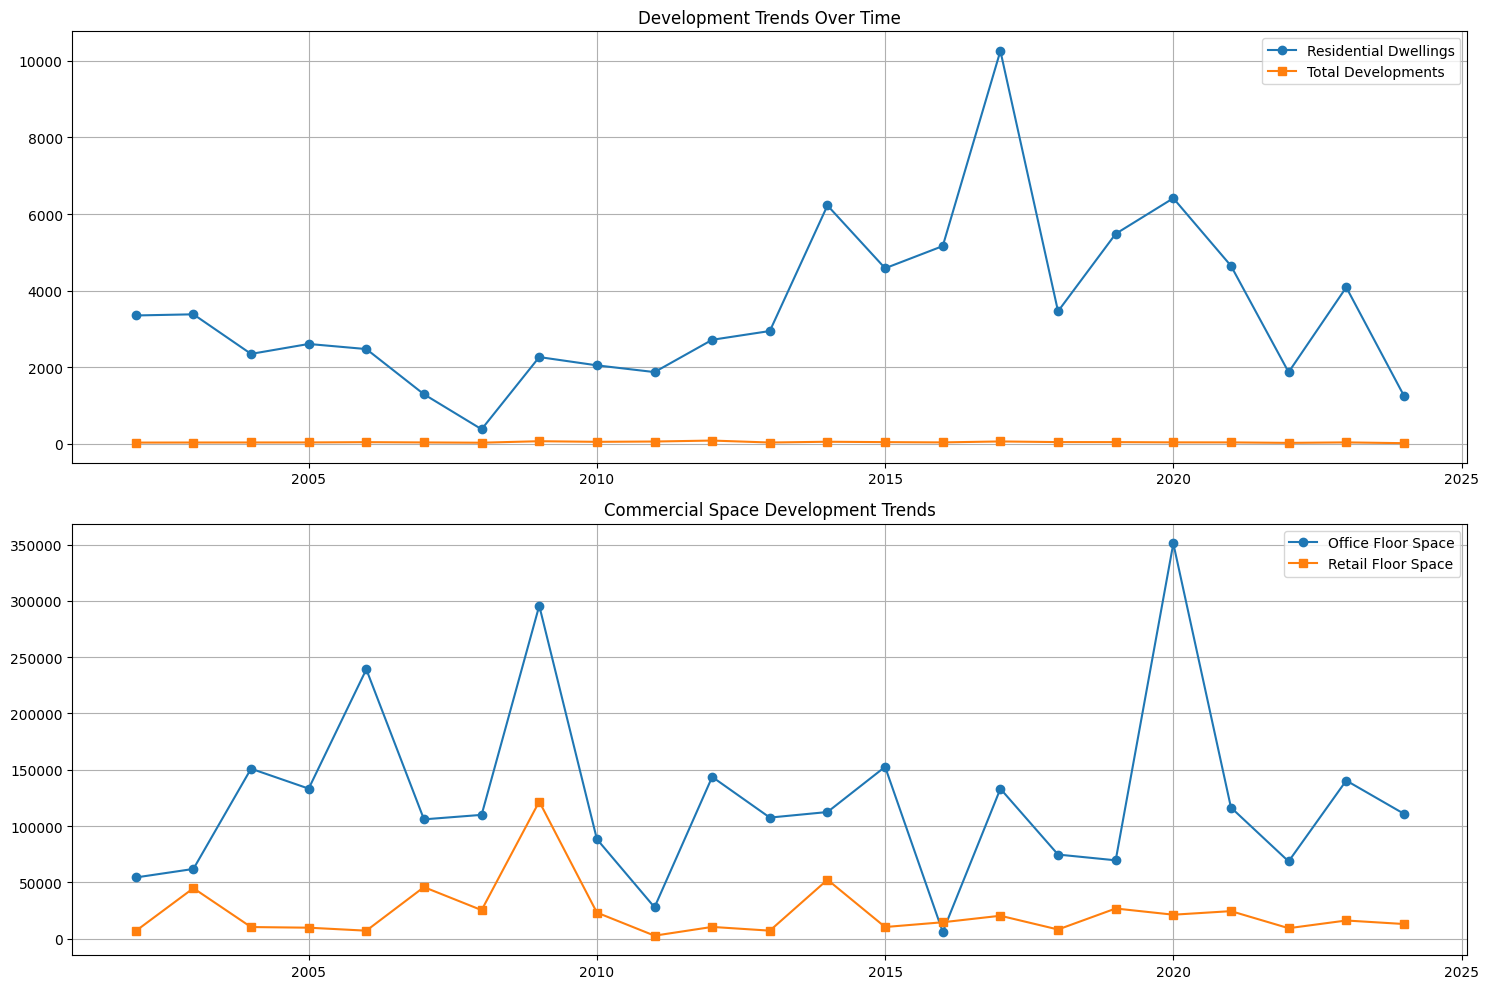

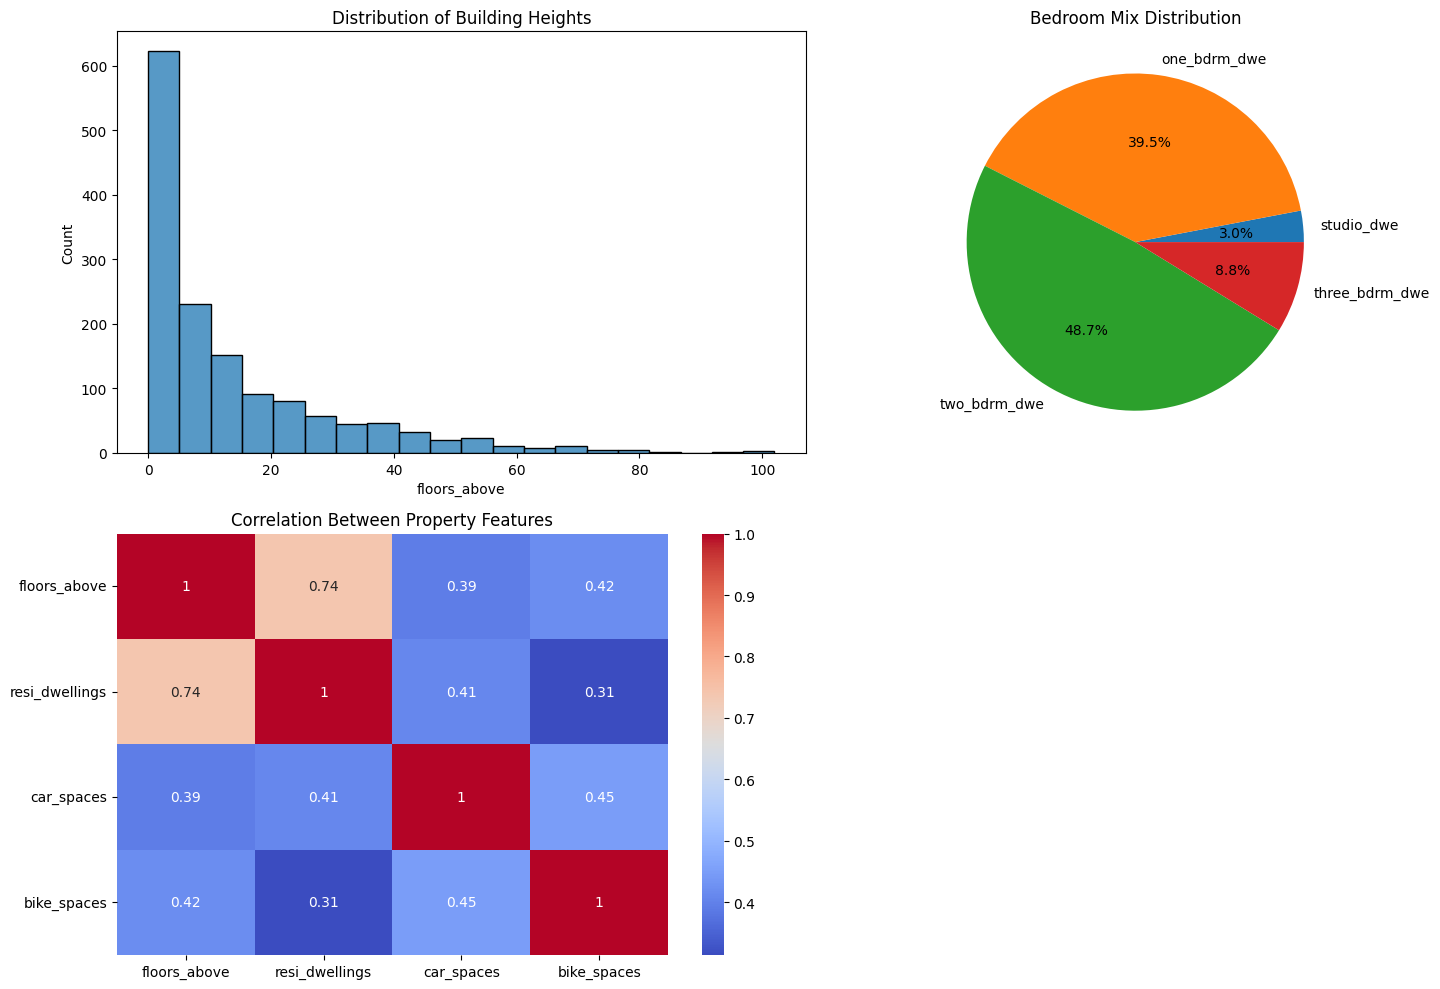

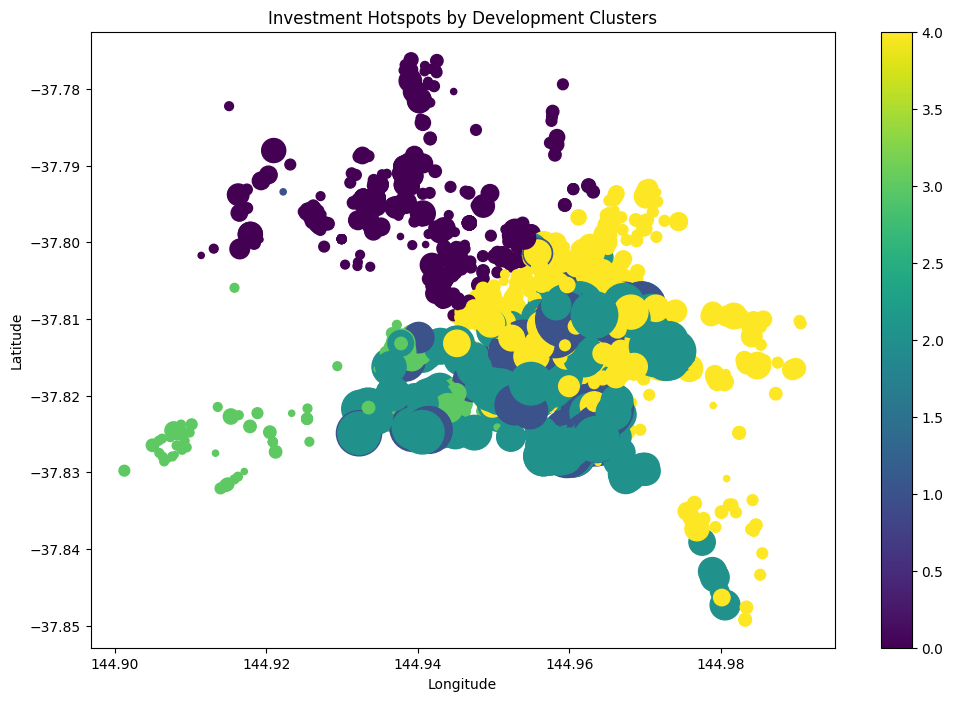

In [20]:
def main():
    # Load data
    dev_df, struct_df = load_and_prepare_data("dataset/development-activity-monitor.csv", "dataset/2020-building-footprints.csv")
    
    # Perform analyses
    yearly_trends = analyze_development_trends(dev_df)
    development_map = create_development_heatmap(dev_df)
    property_stats = analyze_property_characteristics(dev_df)
    hotspots = identify_investment_hotspots(dev_df, struct_df)
    forecast = generate_development_forecast(dev_df)
    
    # Print summary statistics
    print("\nKey Market Insights:")
    print("-" * 50)
    print(f"Total Developments: {len(dev_df)}")
    print(f"Average Building Height: {dev_df['floors_above'].mean():.1f} floors")
    print(f"Total Residential Dwellings: {dev_df['resi_dwellings'].sum()}")
    print(f"Total Commercial Space: {dev_df['office_flr'].sum() + dev_df['retail_flr'].sum()} sqm")
    
    return {
        'yearly_trends': yearly_trends,
        'development_map': development_map,
        'property_stats': property_stats,
        'hotspots': hotspots,
        'forecast': forecast
    }

if __name__ == "__main__":
    results = main()

***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```